# final and final_chi2'

In [1]:
# All the functions of the thesis, taking scaling into account
from thesis_functions_scaled import *

Initial working directory is: F:\Dropbox\Dropbox\Thesis\main_code
Working at home, changing to onedrive folder
D:\Onedrive\Thesis\support\eta
succes, EIF sorted matrix found
settings: Dataframe = phot, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = spec, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = combi, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = u_df, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = u_df, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = u_df, number dropped = 1288, number of trees = 1024, samplesize = 512


Initial working directory is: D:\Onedrive\Thesis\support\final_chi2
Working in onedrive folder
D:\Onedrive\Thesis\support\final_chi2
succes, EIF sorted matrix found
settings: Dataframe = phot, number dropped = 502, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = spec, number dropped = 502, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = combi, number dropped = 502, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = col, number dropped = 502, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = DS, number dropped = 502, number of trees = 1024, samplesize = 512
New file requested
Failed to find this combination, creating one
EIF sorted matrix created and saved
settings: Dataframe = full, number dropped = 502, number of trees = 1024, samplesize = 512
New file requested
Failed to find PFA2 results, creating datab

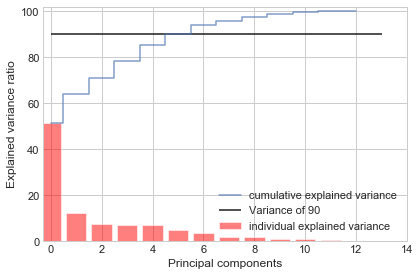

PFA2 Database created
settings: Dataframe = Spectral, run number = 100, p_difference = 0,pov = 90


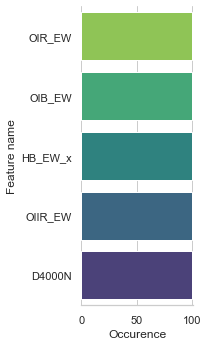

,column_name,occurence
0,OIR_EW,100.0
1,OIB_EW,100.0
2,HB_EW_x,100.0
3,OIIR_EW,100.0
4,D4000N,100.0


In [29]:
#Working directory control
cwd = os.getcwd() 

#Selecting dataset
#change dataset here, Alpha, prichi or beta 
#dataset = "Alpha"      #Initial max row dataset
#dataset = "prichi"     #prichi < 3 filtered dataset, 24999 rows. OBSELETE
#dataset = "beta"       #prichi < 2 filtered dataset, 13787 rows
#dataset = "gamma"      #prichi < 2 filtered dataset, (removed photometric)) OBSELETE
#dataset = "delta"      #updated DB creator, based on GaussFitSimple, 28128  rows
#dataset = "epsilon"    #trimmed down version of delta, prichi <2, 10941 rows (for easier computation)

#dataset = "zeta"       # Full Photometric, GaussFitSimple, prichi <2, 10941 rows × 134 columns
#dataset = "eta"       # Full Photometric, GaussFitSimple, all columns

#dataset = "final"       # no u and Y, no absmag10RE or MUAVG, full 57594 
dataset = "final_chi2"       # no u and Y, no absmag10RE or MUAVG, filtered 10047


detect_path = True   #this is for easier working in spyder

 #Set up directory path, load initial dataframes
if detect_path == True:
    print("Initial working directory is:", cwd) 
    if '31618' in cwd:
        print("Working at Dora")
        location = "dora"
    if 'Dainean' in cwd:
        print("Working at home, changing to onedrive folder")
        location = "home"
    if 'Onedrive' in cwd:
        print("Working in onedrive folder")
        location = "home"
    if 'Dropbox' in cwd:
        print("Working at home, changing to onedrive folder")
        location = "home"
    
    
    if location == "home":
        os.chdir('D:\Onedrive\Thesis\support\%s'%(dataset))
        print(os.getcwd())

    
    if location == "dora":
        os.chdir('C:\Sander\support\%s'%(dataset))
        print(os.getcwd())
            
    #Loading dataframes     Only part for now
    phot = pd.read_hdf('Parts_DB.h5', 'Photometric') 
    phot.name = "phot"
    col = pd.read_hdf('Parts_DB.h5', 'Colour')  
    col.name = "col"
    spec = pd.read_hdf('Parts_DB.h5', 'Spectral') 
    spec.name = "spec"
    spec_ds = pd.read_hdf('Parts_DB.h5', 'Direct_Summation') 
    spec_ds.name = "DS"
   # full = pd.read_hdf('ThesisDB.h5', 'Dataframe') 
 #   full = full.iloc[:,4:]

    dropped = int(phot.shape[0] * 0.05)   #we can safely drop 5% of our dataset. 
    # Is this enough with such a large feature space? It seems to be more then we get by filtering EIF above 0.5 out!


#full = full.iloc[:,6:] #Addition
    combi = pd.merge(phot,spec, right_index=True, left_index=True, how='inner')  #just phot and spec
    combi.name = "combi"
    
    #setup filtered dataframes
remake = False
phot_eif  = eif_isolation(phot, dropped = dropped, remake = remake)
phot_eif.name = 'Photometric'
spec_eif  = eif_isolation(spec, dropped = dropped, remake = remake)
spec_eif.name = 'Spectral'

combi_eif = eif_isolation(combi, dropped = dropped, remake = remake)
combi_eif.name =  'Combined'
col_eif = eif_isolation(col, dropped = dropped, remake = remake)
col_eif.name = 'Colour'



DS = pd.merge(phot.iloc[:,1],spec_ds,right_index=True, left_index=True, how='inner').iloc[:,1:]
DS.name = "DS"
ds_eif  = eif_isolation(DS, dropped = dropped, remake = remake)
ds_eif.name = 'Direct_Summation'
ds_eif

full = pd.merge(combi, DS,right_index=True, left_index=True, how='inner')
full.name = "full"
full_eif = eif_isolation(full, dropped = dropped, remake = True)
full_eif.name = "full"


dataframes = [phot_eif,spec_eif,combi_eif,ds_eif,full_eif]
plot_PFA(spec_eif, 100,remake=True)

In [28]:
full = pd.merge(combi, DS,right_index=True, left_index=True, how='inner')


,absmag_g,size90_g,sizeRE_g,SersicIndex_g,Ellipticity_g,MU@0_g,MU@E_g,absmag_r,size90_r,sizeRE_r,...,Ellipticity_H,MU@0_H,MU@E_H,absmag_K,size90_K,sizeRE_K,SersicIndex_K,Ellipticity_K,MU@0_K,MU@E_K
CATAID,,,,,,,,,,,,,,,,,,,,,
6802,-17.607029,2.314525,1.089591,0.8026,0.5906,19.558212,20.955488,-18.067165,2.580366,1.160703,...,0.7774,17.847504,18.981232,-18.441076,2.261476,1.108027,0.7182,0.6687,18.497427,19.713715
6837,-19.377591,10.825701,4.470922,1.1062,0.6909,20.137457,22.188929,-19.835616,11.748093,4.731153,...,0.7098,18.131268,20.581566,-20.156218,10.125538,3.729863,1.4055,0.7441,17.953623,20.652346
6838,-18.744098,17.645266,4.875813,2.2988,0.7260,18.606888,23.241796,-18.941279,13.301755,4.138872,...,0.7044,18.794977,21.348261,-18.834756,4.348900,2.681564,0.3063,0.5852,20.817305,21.172449
6840,-21.011358,35.730529,6.323481,4.0818,0.2250,15.098329,23.602678,-21.900432,26.565666,5.348294,...,0.2254,10.335721,20.977333,-22.630174,27.258364,3.930294,5.0644,0.1076,9.613863,20.251350
6846,-19.514626,11.141746,5.192028,0.8247,0.2325,21.826874,23.271627,-19.932446,11.581901,5.025152,...,0.2640,19.937643,21.559019,-19.926914,7.780783,2.896070,1.3770,0.2079,18.889442,21.526478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901140,-20.827143,13.013491,6.916279,0.5583,0.2358,21.731611,22.607206,-22.025191,15.845890,6.833770,...,0.2042,17.574690,19.844414,-22.935829,14.780808,5.364245,1.4468,0.2938,17.014204,19.802336
3901178,-20.474143,17.721241,8.904940,0.6668,0.4108,22.042744,23.149132,-21.749981,21.930089,8.714546,...,0.4409,15.871984,21.522669,-22.643742,24.200325,7.178157,2.0599,0.2299,16.817368,20.934143
3901184,-19.872351,12.937720,7.165246,0.4833,0.7812,21.584372,22.301888,-20.374276,12.516396,6.798022,...,0.7920,17.801258,19.680454,-21.696274,9.837084,4.388598,0.9222,0.7988,17.368603,19.023146


In [36]:
def plot_PFA(eif_df, run_nr = 15, p_dif = 0, pov = 90, remake = False):
    """
    Parameters
    ----------
    eif_df : pandas dataframe
        This needs to befiltered with anomaly detection such as EIF already
    run_nr : Integer, optional
        Amount of runs to do. The default is 15.
    p_dif : int, optional
        p > q, slightly higher number of features is in some cases needed. The default is 0.
    pov : int, optional
        Retained variability in %. The default is 90.
    remake : Boolean, optional
        Set to True if you want to remake previously stored data. The default is False.

    Returns
    -------
    dataframe with column numbers of eif_df and occurence of these columns over all runs combined
    a bar plot showing the occurence parameters over run_nr runs. This plot has been adjusted to 
    only display parameters which occur atleast 0.10 * run_nr amount of times (10%)

    """
    try:
        DF_name = eif_df.name
    except:
        DF_name = "custom"
    #    
        
    results_df = pfa2_loader(eif_df, run_nr = run_nr, p_dif = p_dif, pov = pov, remake = remake)   

    # -------------------------------------------------------------
    # We now have loaded (and if required created) a dataframe with results for n_list
    # If we want to change n_list, we must make sure it's saved and loaded by a new name, or replace the old
    sns.set(style="whitegrid",font_scale=1)


    #Set up the variables
    results_top = results_df[results_df.iloc[:,1].values >= run_nr * 0.2]


    #    Setting up the size of the plot, dependant on the number of outputs 
    fig, ax = plt.subplots(figsize=(3,7.5))

    #Do the actual plotting
    sns.barplot(x='occurence',y='column_name',data=results_top,palette ="viridis_r")
    ax.set(xlim= [0,run_nr+1],xlabel="Occurence",ylabel = "Feature name")
   # plt.title("Top %s features, %i runs, p_dif = %i, POV = %i" %(DF_name,run_nr,p_dif,pov),size='14')
    sns.despine(left=True, bottom=False)   #removes spines
    plt.savefig("pics/PFA/PFA2_%s_%i_%i_%i"%(DF_name,run_nr,p_dif,pov),bbox_inches="tight")
    plt.show()
    
    return results_df
#for i in dataframes:
 #   PFA2_plot(i, 100)


New file requested
Failed to find this combination, creating one
EIF sorted matrix created and saved
settings: Dataframe = spec, number dropped = 1004, number of trees = 1024, samplesize = 512
New file requested
Failed to find PFA2 results, creating database


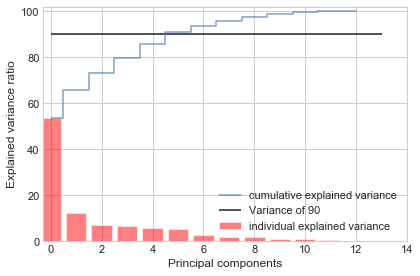

PFA2 Database created
settings: Dataframe = Spectral, run number = 100, p_difference = 0,pov = 90


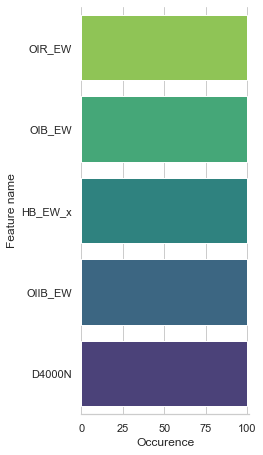

,column_name,occurence
0,OIR_EW,100.0
1,OIB_EW,100.0
2,HB_EW_x,100.0
3,OIIB_EW,100.0
4,D4000N,100.0


In [37]:
spec_eif  = eif_isolation(spec, dropped = dropped*2, remake = True)
spec_eif.name = 'Spectral'

plot_PFA(spec_eif, 100,remake= True)

New file requested
Failed to find this combination, creating one
EIF sorted matrix created and saved
settings: Dataframe = spec, number dropped = 1004, number of trees = 1024, samplesize = 512
New file requested
Failed to find PFA2 results, creating database


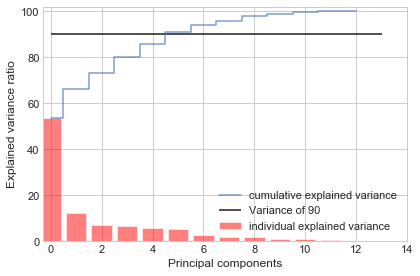

PFA2 Database created
settings: Dataframe = Spectral, run number = 100, p_difference = 0,pov = 90


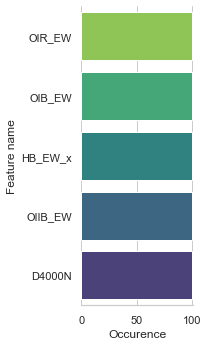

,column_name,occurence
0,OIR_EW,100.0
1,OIB_EW,100.0
2,HB_EW_x,100.0
3,OIIB_EW,100.0
4,D4000N,100.0


In [20]:
spec_eif  = eif_isolation(spec, dropped = dropped*2, remake = True)
spec_eif.name = 'Spectral'

plot_PFA(spec_eif, 100,remake= True)

New file requested
Failed to find this combination, creating one
EIF sorted matrix created and saved
settings: Dataframe = spec, number dropped = 1004, number of trees = 1024, samplesize = 512
New file requested
Failed to find PFA2 results, creating database


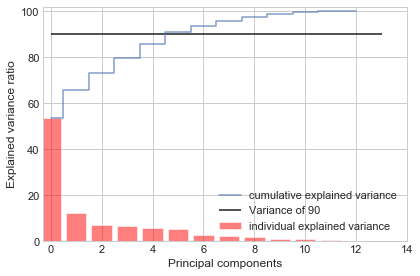

PFA2 Database created
settings: Dataframe = Spectral, run number = 100, p_difference = 0,pov = 90


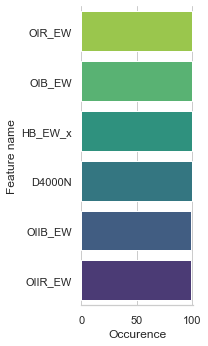

,column_name,occurence
0,OIR_EW,100.0
1,OIB_EW,100.0
2,HB_EW_x,100.0
3,D4000N,100.0
4,OIIB_EW,99.0
5,OIIR_EW,99.0
6,OIIIR_EW_x,1.0


In [21]:
spec_eif  = eif_isolation(spec, dropped = dropped*2, remake = True)
spec_eif.name = 'Spectral'

plot_PFA(spec_eif, 100,remake= True)

New file requested
Failed to find this combination, creating one
EIF sorted matrix created and saved
settings: Dataframe = spec, number dropped = 1004, number of trees = 1024, samplesize = 512
New file requested
Failed to find PFA2 results, creating database


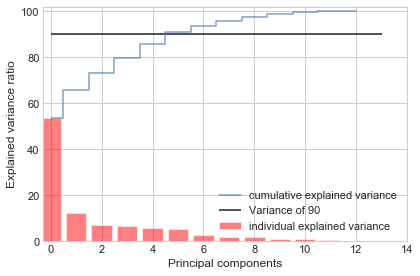

PFA2 Database created
settings: Dataframe = Spectral, run number = 100, p_difference = 0,pov = 90


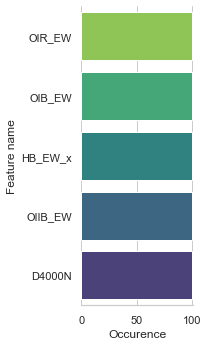

,column_name,occurence
0,OIR_EW,100.0
1,OIB_EW,100.0
2,HB_EW_x,100.0
3,OIIB_EW,100.0
4,D4000N,100.0


In [22]:
spec_eif  = eif_isolation(spec, dropped = dropped*2, remake = True)
spec_eif.name = 'Spectral'

plot_PFA(spec_eif, 100,remake= True)

New file requested
Failed to find PFA2 results, creating database


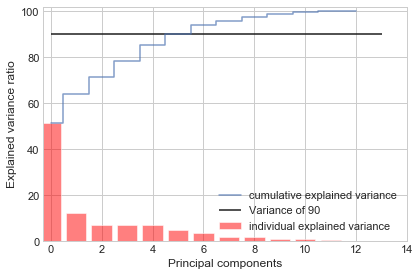

PFA2 Database created
settings: Dataframe = Spectral, run number = 100, p_difference = 0,pov = 90


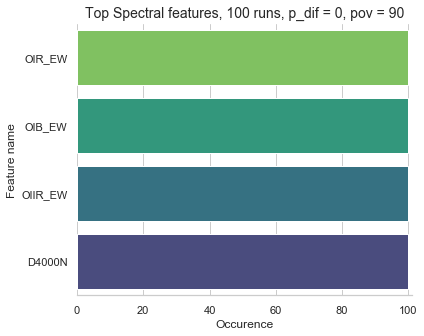

,column_name,occurence
0,OIR_EW,100.0
1,OIB_EW,100.0
2,OIIR_EW,100.0
3,D4000N,100.0


In [10]:
plot_PFA(spec_eif, 100,remake=True)

In [25]:
full

,absmag_g,size90_g,sizeRE_g,SersicIndex_g,Ellipticity_g,MU@0_g,MU@E_g,absmag_r,size90_r,sizeRE_r,...,i-z,i-J,i-H,i-K,z-J,z-H,z-K,J-H,J-K,H-K
CATAID,,,,,,,,,,,,,,,,,,,,,
6802,-17.607029,2.314525,1.089591,0.8026,0.5906,19.558212,20.955488,-18.067165,2.580366,1.160703,...,0.206217,0.300545,0.301491,0.077065,0.094329,0.095274,-0.129151,0.000945,-0.223480,-0.224425
6808,-20.325371,23.458894,5.293303,3.0496,0.1424,17.400131,23.664072,-21.863351,37.602150,6.666150,...,-0.146986,0.030706,0.710239,0.427133,0.177692,0.857225,0.574119,0.679534,0.396427,-0.283106
6830,-19.240993,9.884591,4.961814,0.6689,0.2597,22.161665,23.272537,-19.534663,9.243773,4.528833,...,-0.117178,0.069667,0.344550,-0.092084,0.186845,0.461728,0.025094,0.274882,-0.161751,-0.436634
6835,-19.861164,44.068958,18.577932,1.0558,0.7653,22.804188,24.746834,-20.842296,32.268838,15.205740,...,0.297195,0.800120,1.282218,1.258759,0.502925,0.985024,0.961564,0.482098,0.458639,-0.023460
6837,-19.377591,10.825701,4.470922,1.1062,0.6909,20.137457,22.188929,-19.835616,11.748093,4.731153,...,0.065294,0.120650,0.445311,0.148113,0.055356,0.380017,0.082819,0.324661,0.027463,-0.297198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901768,-20.150908,15.438425,7.439601,0.7528,0.6185,21.353861,22.644276,-20.872296,14.558762,7.031748,...,-0.031775,0.135882,0.502703,0.411192,0.167657,0.534477,0.442967,0.366820,0.275310,-0.091510
3973288,-17.035029,81.646704,1.610809,19.9210,0.3793,-18.354904,24.541628,-18.356359,132.710320,2.612615,...,-0.433909,0.040505,0.471887,-0.103431,0.474414,0.905796,0.330479,0.431382,-0.143935,-0.575318
4085058,-19.368528,14.459981,9.772052,0.1743,0.9324,21.717024,21.832502,-20.606469,14.434406,10.569423,...,0.222406,0.713602,0.910633,1.435805,0.491195,0.688227,1.213398,0.197032,0.722203,0.525171


succes, PFA2 results found
settings: Dataframe = Photometric, run number = 100, p_difference = 0,pov = 90


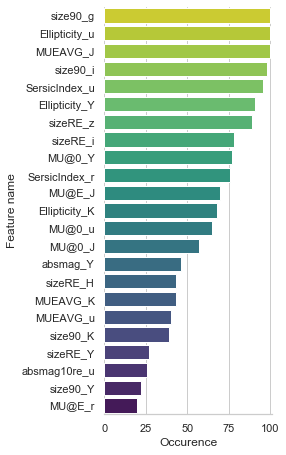

succes, PFA2 results found
settings: Dataframe = Photometric, run number = 100, p_difference = 2,pov = 90


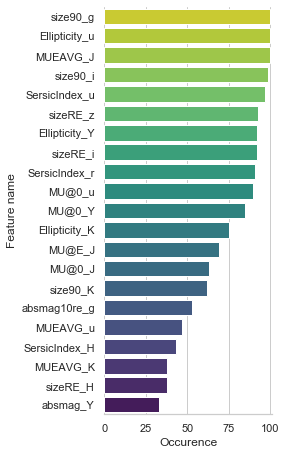

succes, PFA2 results found
settings: Dataframe = Spectral, run number = 100, p_difference = 0,pov = 90


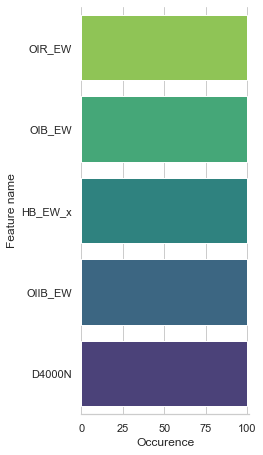

succes, PFA2 results found
settings: Dataframe = Spectral, run number = 100, p_difference = 2,pov = 90


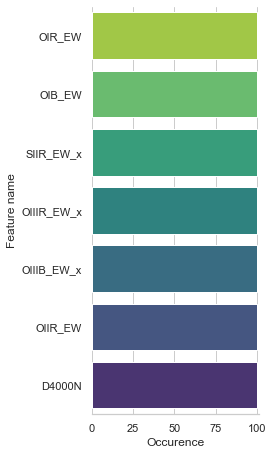

succes, PFA2 results found
settings: Dataframe = Combined, run number = 100, p_difference = 0,pov = 90


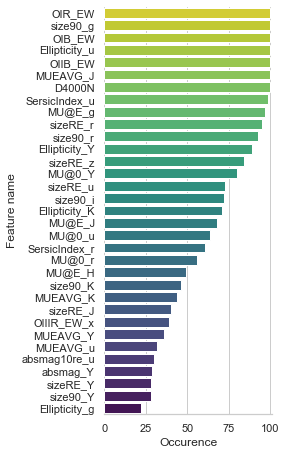

succes, PFA2 results found
settings: Dataframe = Combined, run number = 100, p_difference = 2,pov = 90


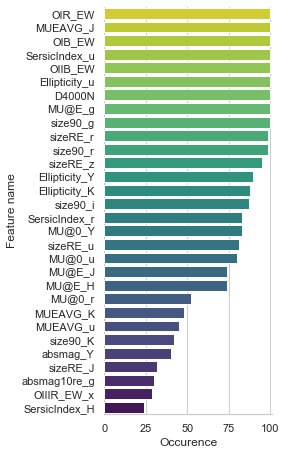

succes, PFA2 results found
settings: Dataframe = Direct_Summation, run number = 100, p_difference = 0,pov = 90


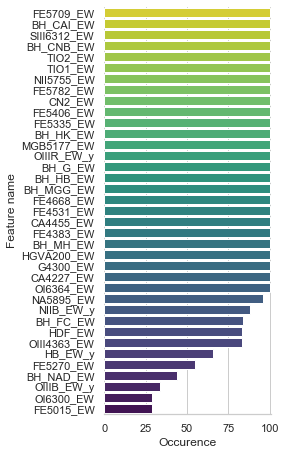

succes, PFA2 results found
settings: Dataframe = Direct_Summation, run number = 100, p_difference = 2,pov = 90


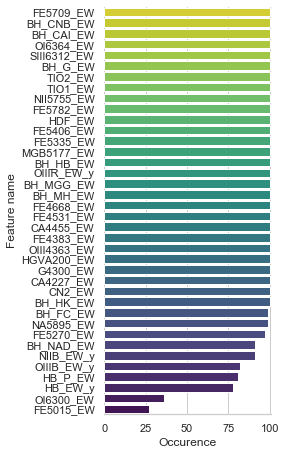

succes, PFA2 results found
settings: Dataframe = full, run number = 100, p_difference = 0,pov = 90


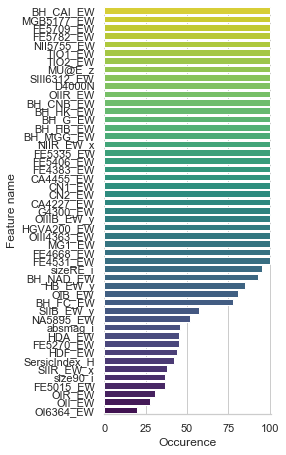

succes, PFA2 results found
settings: Dataframe = full, run number = 100, p_difference = 2,pov = 90


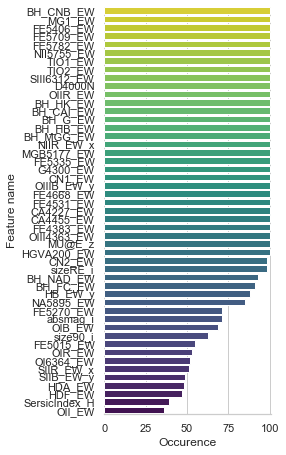

In [38]:
remake = False
for i in dataframes:
 #   PFA_plot(i, 10,100)
    plot_PFA(i, 100,remake=remake)
   # plot_PFA(i, 100, p_dif = 1,remake=remake)    
    plot_PFA(i, 100, p_dif = 2,remake=remake)    

In [39]:
def WNCH(X, cluster_predict, n_clusters,  L_r,):
    """
    Weighted Normalised Calinski-Harabasz Index
    input: 
    X = pandas dataframe, shape: (n_samples , n_features). Each is a single data point
    Will assume lap_part if none is given
    lables = an array, shaped to (n_samples), predicting the label for each sample
    Will assume cluster_predict if none is given
    
    Returns:
    score as a float
    possible adjustment proposed:First number explodes so start n_features at 0 rather then 1.
    This means the graph always starts at 0
    """
    
    n_features = X.shape[1]
    n_samples = X.shape[0]    #the sample size, or n
    
    extra_disp = 0.
    intra_disp = 0.
    
    mean = np.mean(X, axis=0).values # mean of the whole partial matrix, per feature


    for k in range(n_clusters):
        cluster_k = X[cluster_predict == k].values   # a matrix with just objects belonging to this cluster
        mean_k = np.mean(cluster_k, axis=0)                 # the mean vector for every feature
        extra_disp += len(cluster_k) * np.sum((mean_k - mean) ** 2)  #add to the trace of S_B (non diagonal cancel out)
        intra_disp += np.sum((cluster_k - mean_k) ** 2)              #add to the trace of S_W (non diagonal cancel out)
    
    y =  (extra_disp * (n_samples - n_clusters) * n_features) / (intra_disp * (n_clusters - 1) * L_r )
    #print('y =',y)
    if intra_disp == 0.:
        return 1
    else:
        return y
     #%%   
def WNCH2(X, cluster_predict, n_clusters,  L_r,):
    """
    Weighted Normalised Calinski-Harabasz Index, alternative
    input: 
    X = pandas dataframe, shape: (n_samples , n_features). Each is a single data point
    Will assume lap_part if none is given
    lables = an array, shaped to (n_samples), predicting the label for each sample
    Will assume cluster_predict if none is given
    
    Returns:
    score as a float
    ===============
    Adjustment made: First number explodes so start n_features at 0 rather then 1.
    This means the graph always starts at 0
    """
    
    n_features = X.shape[1]
    n_samples = X.shape[0]    #the sample size, or n
    
    extra_disp = 0.
    intra_disp = 0.
    
    mean = np.mean(X, axis=0).values # mean of the whole partial matrix, per feature


    for k in range(n_clusters):
        cluster_k = X[cluster_predict == k].values   # a matrix with just objects belonging to this cluster
        mean_k = np.mean(cluster_k, axis=0)                 # the mean vector for every feature
        extra_disp += len(cluster_k) * np.sum((mean_k - mean) ** 2)  #add to the trace of S_B (non diagonal cancel out)
        intra_disp += np.sum((cluster_k - mean_k) ** 2)              #add to the trace of S_W (non diagonal cancel out)
    
    #print('y =',y)
    if intra_disp == 0.:
        return 1
    else:
        y =  (extra_disp * (n_samples - n_clusters) * (n_features-1)) / (intra_disp * (n_clusters - 1) * L_r )
        return y
                
 #%%   
#non weighted nor normalised Calinski-Harabasz (comparison reasons)
def CH(X, cluster_predict, n_clusters):
    """
    Calinski-Harabasz Index
    input: 
    X = pandas dataframe, shape: (n_samples , n_features). Each is a single data point
    Will assume lap_part if none is given
    lables = an array, shaped to (n_samples), predicting the label for each sample
    Will assume cluster_predict if none is given
    
    Returns:
    score as a float
    """
    n_samples = X.shape[0]    
    extra_disp, intra_disp = 0., 0.
    mean = np.mean(X, axis=0).values # mean of the whole partial matrix, per feature


    for k in range(n_clusters):
        cluster_k = X[cluster_predict == k].values  # a matrix with just objects belonging to this cluster
        mean_k = np.mean(cluster_k, axis=0)                 # the mean vector for every feature
        extra_disp += len(cluster_k) * np.sum((mean_k - mean) ** 2)
        intra_disp += np.sum((cluster_k - mean_k) ** 2)

    return (1. if intra_disp == 0. else
        extra_disp * (n_samples - n_clusters) /
        (intra_disp * (n_clusters - 1.)))
#%%


def LS_WNCH_SR(eif_df, k = 3, remake = False):
    """
    Laplacian Score-WNCH-Simple Ranking 
    ======================================
    Input:
    DF_name: Name of the dataframe, one of four possible right now, this is an F * N matrix
    F = number of features, N = number of datapoints)
    dropped: amount of data to be filtered with EIF
    k: the value of k for the k-means clustering test
    remake: Wether or not to remake the laplacian order matrix (memory intensive)
    
    ======================================
    Output: 
    
    ===============================================================
    Description:
    First hybrid method
    Builds n feature subsets (as many as featur)
    Uses KMeans
    =================================================================
    
    
    Based on Solario-Fernandez et al, 2019 [1], 
    Sources: 
    sklear: https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index
    Python notebook: https://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/
    master/dimensionality_reduction/projection/linear_discriminant_analysis.ipynb#LDA-in-5-steps
    Books
    """
    
    y_best = -np.inf
    y_list = []

    #laplace order
    lap_matrix = laplace_order(eif_df)
    max_features = lap_matrix.shape[0]

    for n_features in range(0,max_features):      #number of features we want to analyse over, start at 0 so add +1 where required

        
        #set some variables for WNCH 
        
        L_r = lap_matrix.iloc[n_features,1]             # Laplacian score associated with last r-th feature added or eliminated
        names = lap_matrix.iloc[:n_features+1].feature.values   # names of the top n features as an array 
        lap_part = eif_df[names]     #make a new (partial) dataframe containing only these features (This is S_0)!


        # Run a clustering algorhitm (Kmeans chosen here)
        scaler = StandardScaler()
        scaled = pd.DataFrame(scaler.fit_transform(lap_part),index=lap_part.index,columns=lap_part.columns)
        kmeans = KMeans(n_clusters= k).fit(scaled)  # set up a KMeans object, with expected amount of clusters, and fit to the partal dataframe
        cluster_predict = kmeans.predict(scaled)              #execute kmeans to predict, each object will be labeled with cluster number
        # cluster_centers = kmeans.cluster_centers_               #find the cluster centers (unused)
        
        # Calculate WNCH score:
        y = WNCH(scaled, cluster_predict, k, L_r)
        #   W2 = CH(lap_part, cluster_predict)  Obselete, for comparison sake
        #   CH_list.append(W2)
        if y > y_best:
            y_best = y
            S_best = names
        y_list.append(y)
        print('feature number: %i, y= %.2f'%(n_features+1,y))
    
    print(cluster_predict)
    data = {'column_name':S_best, 'y_score':y_list[:len(S_best)]}
    short = pd.DataFrame(data = data, dtype='float32')  
    data = {'column_name':names, 'y_score':y_list}
    long = pd.DataFrame(data = data)  
    return short, long
 
def SR_loader(eif_df, k, remake = False):
    """
    Input: 
        eif_df: EIF filtered dataframe
        k: number of clusters
        remake: remake the database entry or not?
    
    Output: 
        short and long dataframe belonging to LS_WNCH_SR
    
    Use: stores the results of LS_WNCH_SR,
    so that it does not need to be rerun every time
    """
    try:
        DF_name = eif_df.name
    except:
        DF_name = "custom"
    
    while True:
        try:
            if remake == True:
                print("New SR file requested")
                raise NameError('Remake')
            long = pd.read_hdf('hybrid_results.h5',"SR_results_%s_k_%i_long_filtered_%i"%(DF_name, k,dropped))
            short =  pd.read_hdf('hybrid_results.h5',"SR_results_%s_k_%i_short_filtered_%i"%(DF_name, k,dropped))
            print("succes, Hybrid results found")
            print("Settings: Database: %s, k = %i"%(DF_name, k))
            break
        except (KeyError,FileNotFoundError, NameError):
            if DF_name == "custom":
                short, long = LS_WNCH_SR(eif_df, k = k,remake=remake)
                break
            print("Failed to find Hybrid results, or remake requested")
            print("Settings: Database: %s, k = %i,"%(DF_name, k))
            short, long = LS_WNCH_SR(eif_df, k = k,remake=remake)            
            long.to_hdf('hybrid_results.h5',"SR_results_%s_k_%i_long_filtered_%i"%(DF_name, k,dropped))
            short.to_hdf('hybrid_results.h5',"SR_results_%s_k_%i_short_filtered_%i"%(DF_name, k,dropped))
            break
      
    return short, long
#%%
def plot_SR(eif_df, k, remake = False):
    """
    
    Parameters
    ----------
    eif_df : pandas dataframe 
        EIF filtered dataframe
    k : integer, optional
        number of clusters. The default is 3.
    remake : boolean, optional
         Remake the results or try to load previous results. The default is False.

    Returns
    -------
    short : pandas DataFrame
        Results of SR hybrid algorhitm
    long : pandas Dataframe
        SR hybrid results for all features

    """
    try:
        DF_name = eif_df.name
    except:
        DF_name = "custom"

    short, long = SR_loader(eif_df, k, remake = remake)
    
    fig, ax = plt.subplots(figsize=(8,8))
    sns.lineplot(data = (long['y_score']))
    plt.savefig("pics/SR/yplot_SR_%s_%i"%(DF_name,k),bbox_inches="tight")
    plt.show()
      
    sns.set(style="whitegrid",font_scale=1.5)
    fig, ax = plt.subplots(figsize=(6,12))
    #plt.xscale('log')
    plt.xlabel("WNCH score")
    plt.title("Most important %s features of SR hybrid, k = %i"%(DF_name,k),size='14')
    sns.barplot(x='y_score',y='column_name',data=short,palette='winter')
    plt.savefig("pics/SR/LS_WNCH_SR_%s_%i"%(DF_name,k),bbox_inches="tight")
    plt.show()
    
    sns.set(style="whitegrid",font_scale=1.2)
    fig, ax = plt.subplots(figsize=(6,24))
    #plt.xscale('log')
    plt.xlabel("WNCH score")
    plt.title("%s features of SR hybrid, k = %i"%(DF_name,k),size='14')
    sns.barplot(x='y_score',y='column_name',data=long,palette='winter')
    plt.savefig("pics/SR/LS_WNCH_SR_complete_%s_%i"%(DF_name,k),bbox_inches="tight")
    plt.show()
    return short, long

#plot_SR(phot_eif, 3, remake = remake)
#plot_SR(combi_eif, 3, remake = remake)


#plot_SR(phot_eif, 2, remake = remake)
#plot_SR(combi_eif, 2, remake = remake)
#plot_SR(phot_eif, 4, remake = remake)

Failed to find Hybrid results, or remake requested
Settings: Database: Photometric, k = 3,
succes, Laplacian results found
settings: Dataset = eta, Dataframe = Photometric, filtered by EIF = 1288 
feature number: 1, y= 544327.21
feature number: 2, y= 324880.45
feature number: 3, y= 290066.26
feature number: 4, y= 395984.79
feature number: 5, y= 425724.37
feature number: 6, y= 529486.59
feature number: 7, y= 586082.59
feature number: 8, y= 660195.59
feature number: 9, y= 663973.72
feature number: 10, y= 672182.22
feature number: 11, y= 656522.32
feature number: 12, y= 692330.26
feature number: 13, y= 714671.86
feature number: 14, y= 716979.39
feature number: 15, y= 727017.88
feature number: 16, y= 748583.57
feature number: 17, y= 807716.50
feature number: 18, y= 841912.78
feature number: 19, y= 887489.33
feature number: 20, y= 953644.19
feature number: 21, y= 1019615.27
feature number: 22, y= 1062285.85
feature number: 23, y= 1094184.81
feature number: 24, y= 1077717.23
feature number: 

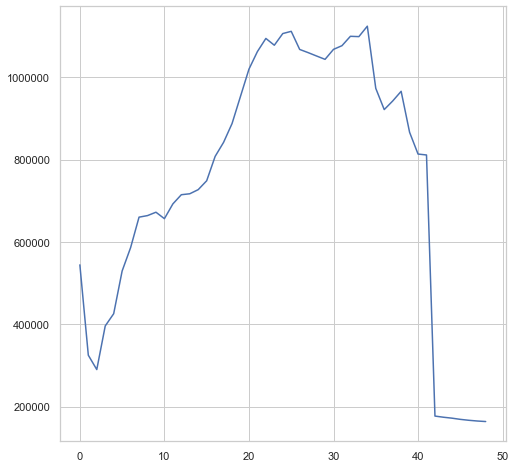

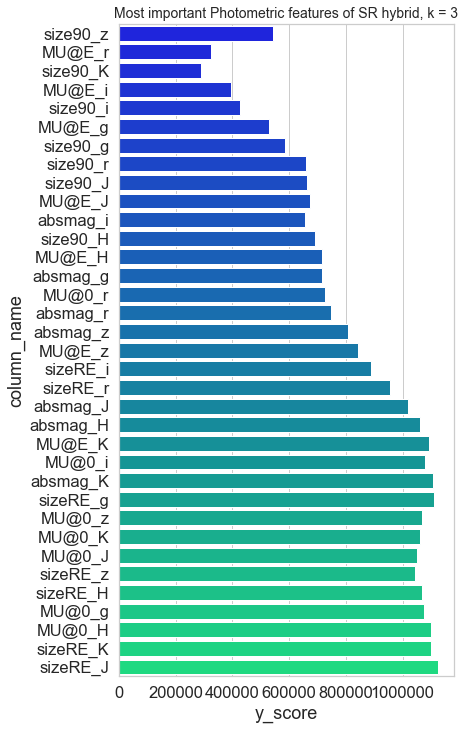

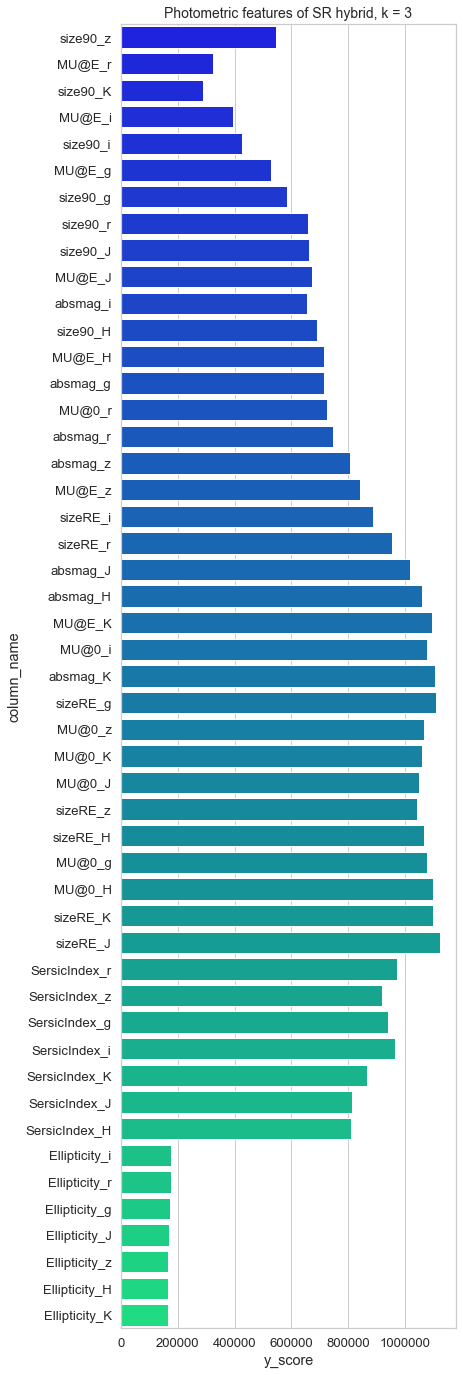

Failed to find Hybrid results, or remake requested
Settings: Database: Spectral, k = 3,
Failed to find Laplacian results, creating database
Laplacian Database created
settings: Dataset = eta, Dataframe = Spectral, filtered by EIF = 1288 
feature number: 1, y= 2468040.73
feature number: 2, y= 1024499.70
feature number: 3, y= 1602059.95
feature number: 4, y= 1363304.57
feature number: 5, y= 707827.83
feature number: 6, y= 577958.31
feature number: 7, y= 494053.96
feature number: 8, y= 439881.40
feature number: 9, y= 253367.36
feature number: 10, y= 176243.34
feature number: 11, y= 165782.23
feature number: 12, y= 134399.93
feature number: 13, y= 122861.24
[0 0 0 ... 2 2 0]


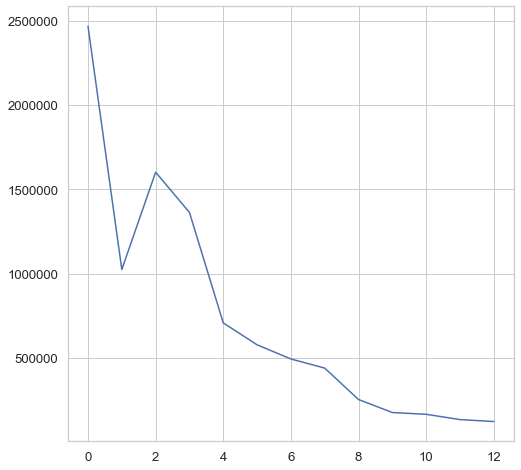

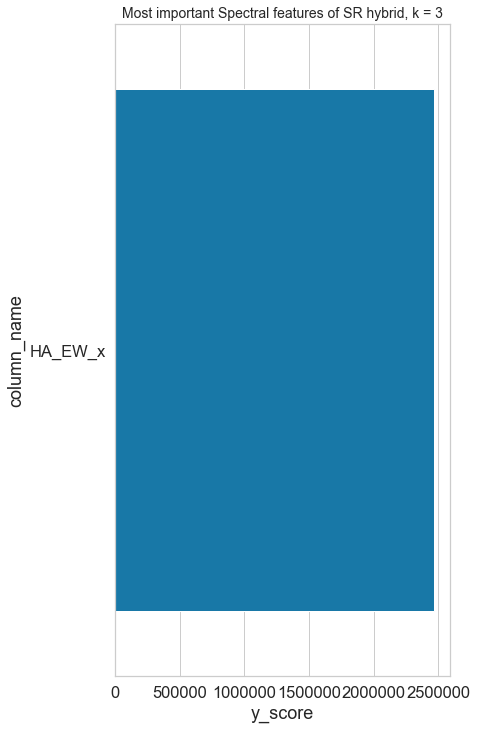

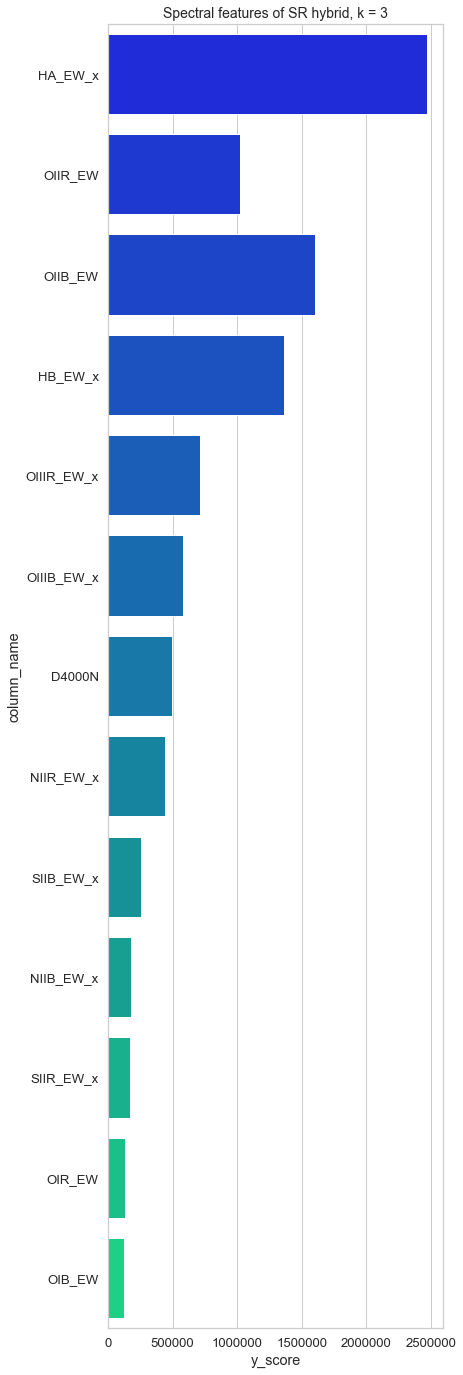

Failed to find Hybrid results, or remake requested
Settings: Database: Combined, k = 3,
succes, Laplacian results found
settings: Dataset = eta, Dataframe = Combined, filtered by EIF = 1288 
feature number: 1, y= 765961.47
feature number: 2, y= 369975.38
feature number: 3, y= 246004.50
feature number: 4, y= 227625.67
feature number: 5, y= 272113.17
feature number: 6, y= 333175.95
feature number: 7, y= 330874.34
feature number: 8, y= 388989.39
feature number: 9, y= 452929.67
feature number: 10, y= 544088.61
feature number: 11, y= 625100.18
feature number: 12, y= 727472.19
feature number: 13, y= 731547.97
feature number: 14, y= 841323.21
feature number: 15, y= 794849.70
feature number: 16, y= 789668.43
feature number: 17, y= 793468.63
feature number: 18, y= 806966.74
feature number: 19, y= 832450.24
feature number: 20, y= 860371.13
feature number: 21, y= 845027.00
feature number: 22, y= 819826.31
feature number: 23, y= 798122.55
feature number: 24, y= 781663.19
feature number: 25, y= 715

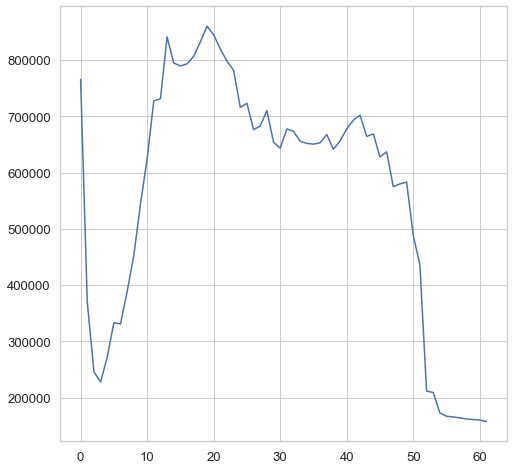

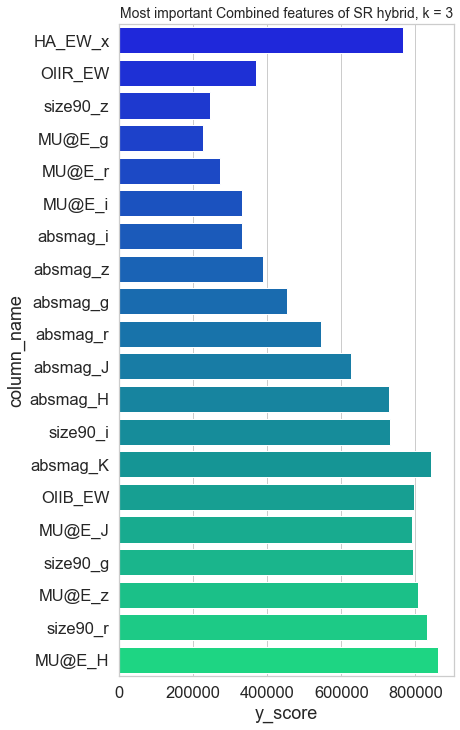

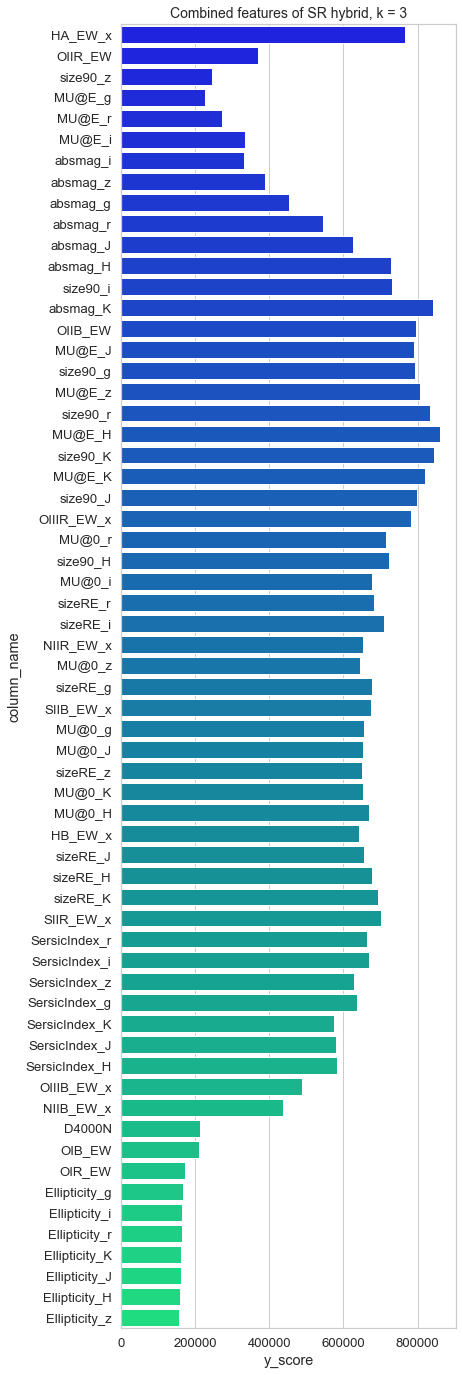

Failed to find Hybrid results, or remake requested
Settings: Database: Direct_Summation, k = 3,
Failed to find Laplacian results, creating database
Laplacian Database created
settings: Dataset = eta, Dataframe = Direct_Summation, filtered by EIF = 1288 
feature number: 1, y= 714989.61
feature number: 2, y= 419358.62
feature number: 3, y= 197795.47
feature number: 4, y= 142436.81
feature number: 5, y= 120441.43
feature number: 6, y= 111931.64
feature number: 7, y= 130353.68
feature number: 8, y= 138886.49
feature number: 9, y= 165041.59
feature number: 10, y= 144485.33
feature number: 11, y= 168120.64
feature number: 12, y= 161696.90
feature number: 13, y= 151519.81
feature number: 14, y= 138128.01
feature number: 15, y= 156364.43
feature number: 16, y= 149032.32
feature number: 17, y= 135007.86
feature number: 18, y= 124638.36
feature number: 19, y= 119714.38
feature number: 20, y= 111450.51
feature number: 21, y= 118350.16
feature number: 22, y= 117435.18
feature number: 23, y= 121290

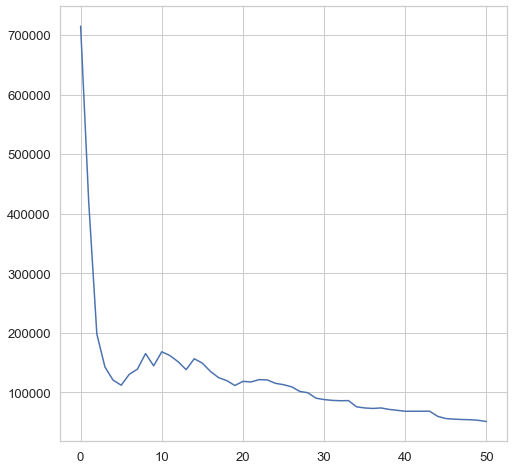

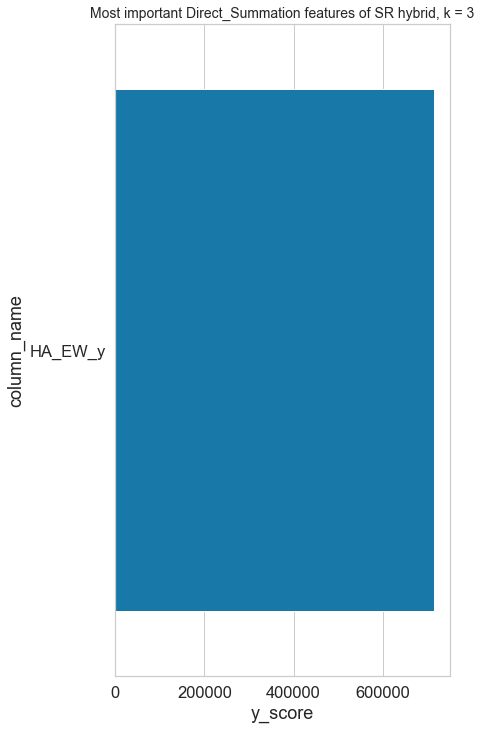

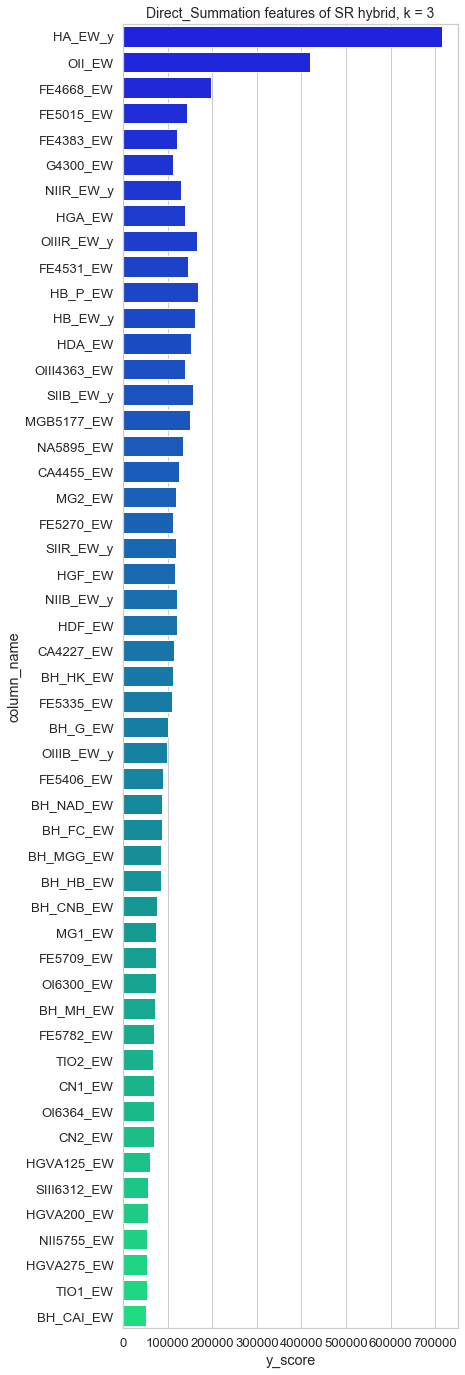

Failed to find Hybrid results, or remake requested
Settings: Database: full, k = 3,
Failed to find Laplacian results, creating database
Laplacian Database created
settings: Dataset = eta, Dataframe = full, filtered by EIF = 1288 
feature number: 1, y= 629124.06
feature number: 2, y= 1200609.35
feature number: 3, y= 465159.50
feature number: 4, y= 334605.91
feature number: 5, y= 356536.54
feature number: 6, y= 314097.85
feature number: 7, y= 374592.75
feature number: 8, y= 377780.05
feature number: 9, y= 428035.67
feature number: 10, y= 488266.72
feature number: 11, y= 497773.00
feature number: 12, y= 573389.82
feature number: 13, y= 663370.21
feature number: 14, y= 640583.46
feature number: 15, y= 734364.01
feature number: 16, y= 704397.23
feature number: 17, y= 718854.24
feature number: 18, y= 733784.83
feature number: 19, y= 731292.67
feature number: 20, y= 729513.28
feature number: 21, y= 727779.66
feature number: 22, y= 730388.59
feature number: 23, y= 670853.85
feature number: 24,

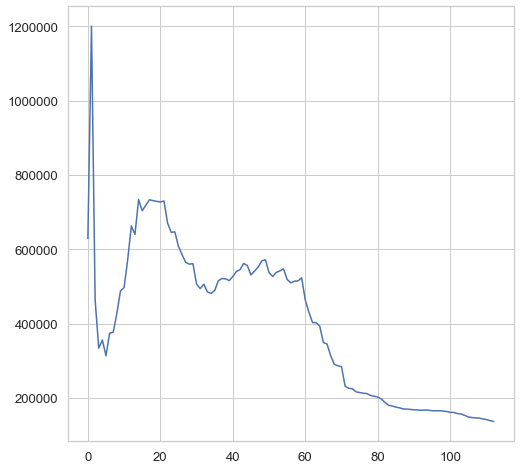

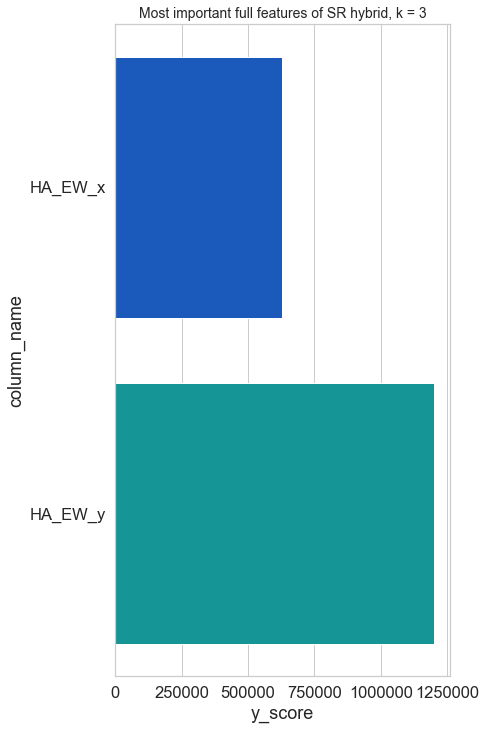

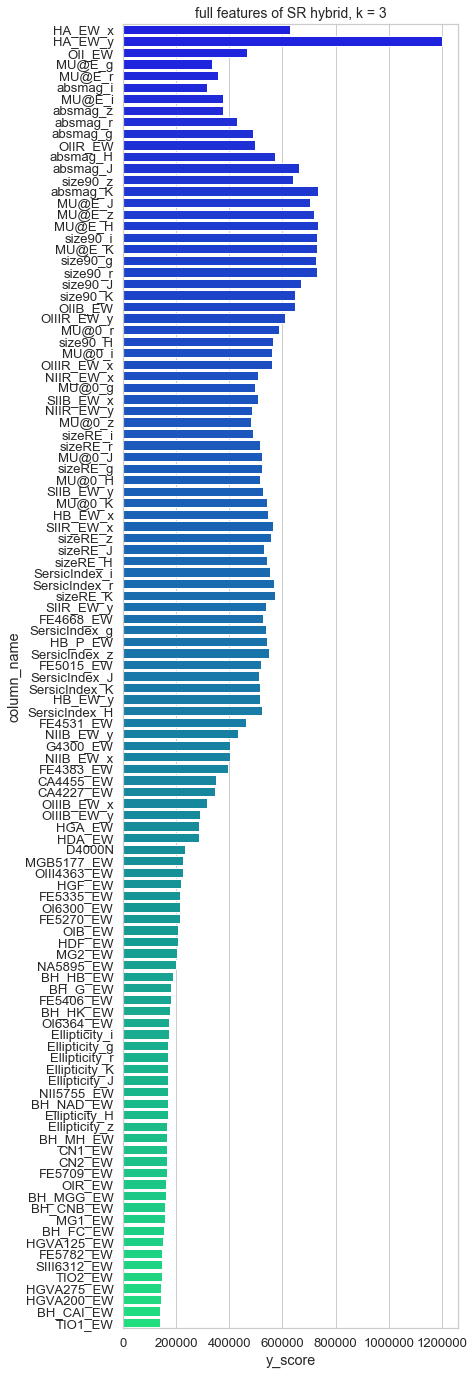

In [43]:
remake = False
for i in dataframes:
    plot_SR(i,3, remake = remake)
    

succes, Hybrid results found
Settings: Database: Photometric, k = 5


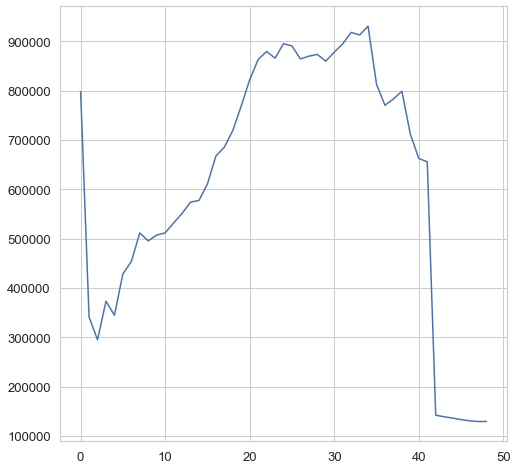

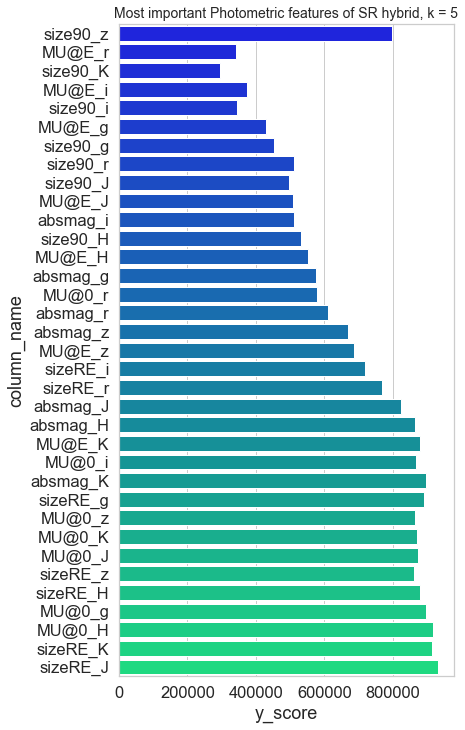

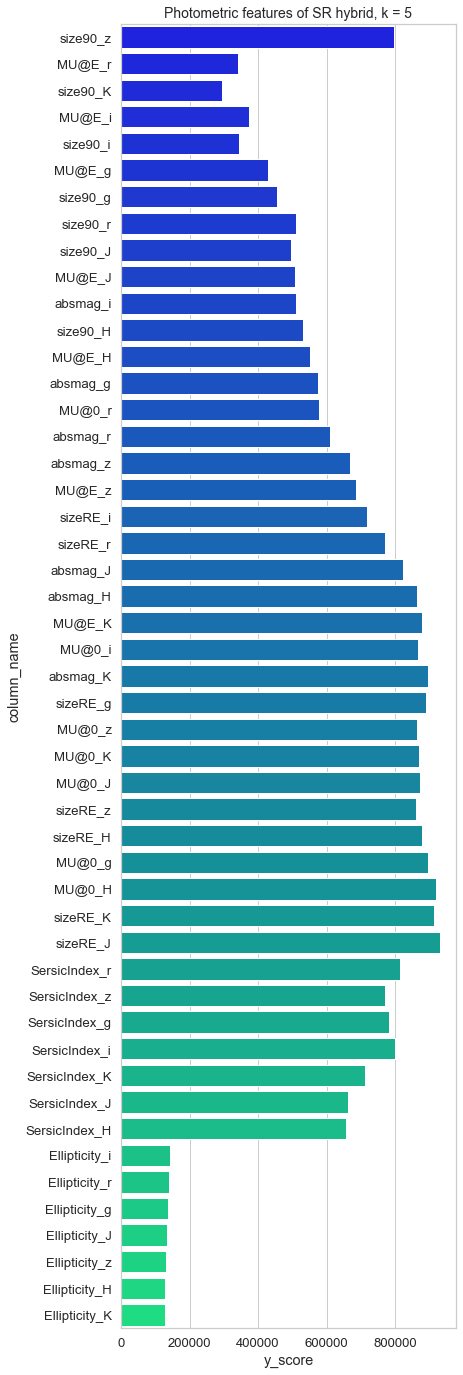

(   column_name       y_score
 0     size90_z  798014.31250
 1       MU@E_r  341176.59375
 2     size90_K  294933.62500
 3       MU@E_i  373188.31250
 4     size90_i  344845.90625
 5       MU@E_g  428502.21875
 6     size90_g  453818.00000
 7     size90_r  511635.21875
 8     size90_J  495480.56250
 9       MU@E_J  507342.62500
 10    absmag_i  511791.28125
 11    size90_H  531907.62500
 12      MU@E_H  551210.18750
 13    absmag_g  574062.06250
 14      MU@0_r  577541.75000
 15    absmag_r  610929.68750
 16    absmag_z  667495.18750
 17      MU@E_z  685638.56250
 18    sizeRE_i  719371.68750
 19    sizeRE_r  769142.50000
 20    absmag_J  822324.31250
 21    absmag_H  863406.06250
 22      MU@E_K  879587.25000
 23      MU@0_i  866111.37500
 24    absmag_K  895559.93750
 25    sizeRE_g  890803.43750
 26      MU@0_z  864448.31250
 27      MU@0_K  870143.12500
 28      MU@0_J  873616.25000
 29    sizeRE_z  859947.06250
 30    sizeRE_H  878200.18750
 31      MU@0_g  894975.37500
 32      M

In [51]:
plot_SR(phot_eif,5, remake = remake)

In [65]:
def WNCH(X, cluster_predict, n_clusters,  L_r,):
    """
    Weighted Normalised Calinski-Harabasz Index
    input: 
    X = pandas dataframe, shape: (n_samples , n_features). Each is a single data point
    Will assume lap_part if none is given
    lables = an array, shaped to (n_samples), predicting the label for each sample
    Will assume cluster_predict if none is given
    
    Returns:
    score as a float
    possible adjustment proposed:First number explodes so start n_features at 0 rather then 1.
    This means the graph always starts at 0
    """
    
    n_features = X.shape[1]
    n_samples = X.shape[0]    #the sample size, or n
    
    extra_disp = 0.
    intra_disp = 0.
    
    mean = np.mean(X, axis=0).values # mean of the whole partial matrix, per feature


    for k in range(n_clusters):
        cluster_k = X[cluster_predict == k].values   # a matrix with just objects belonging to this cluster
        mean_k = np.mean(cluster_k, axis=0)                 # the mean vector for every feature
        extra_disp += len(cluster_k) * np.sum((mean_k - mean) ** 2)  #add to the trace of S_B (non diagonal cancel out)
        intra_disp += np.sum((cluster_k - mean_k) ** 2)              #add to the trace of S_W (non diagonal cancel out)
    
    y =  (extra_disp * (n_samples - n_clusters) * n_features) / (intra_disp * (n_clusters - 1) * L_r )
    #print('y =',y)

    if intra_disp == 0.:
        return 1
    if n_features == 1:
        return y / 4
    else:
        return y
    


y_list = []
rank_list = []
def LS_WNCH_BE(eif_df, k = 3, p = 30):
    
    """
    Laplacian Score-WNCH-Backward Elimination
    ======================================
    Input:
    DF_name: Name of the dataframe, one of four possible right now, this is an F * N matrix
    F = number of features, N = number of datapoints)
    dropped: amount of data to be filtered with EIF
    k: the value of k for the k-means clustering test
    remake: Wether or not to remake the laplacian order matrix (memory intensive)
    
    ======================================
    Output: 
    
    ===============================================================
    Description:
    First hybrid method
    Builds n feature subsets (as many as featur)
    
    =================================================================
    
    
    Based on Solario-Fernandez et al, 2019 [1], 
    Sources: 
    sklear: https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index
    Python notebook: https://nbviewer.jupyter.org/github/rasbt/pattern_classification/
    blob/master/dimensionality_reduction/projection/linear_discriminant_analysis.ipynb#LDA-in-5-steps
    Books
    """
    global y_list, rank_list, S_best  #Due to recursion, we will otherwise lose this information
    # global y_list, rank_list, S_best  #Due to recursion, we will otherwise lose this information
    y_list2 = []     #Alternative for plotting
    S_best = 0
   # y_list.append(np.nan)
    X_S0 = eif_df  #need to define a global name for the matrix we are using
    #   DF_name = get_df_name(X_S0)   #gets the name of the original matrix    
    n_clusters = k


    # What to return if there is only one feature?
    if X_S0.shape[1] == 1:
        print("only one feature")
        S_best = X_S0.columns[0]
        # Calculate Y_best score here aswell (for comparison with different k)
        lap_part = pd.DataFrame(X_S0[S_best])
        scaler = StandardScaler()
        scaled = pd.DataFrame(scaler.fit_transform(lap_part),index=lap_part.index,columns=lap_part.columns)
        kmeans = KMeans(n_clusters= n_clusters).fit(scaled)
        cluster_predict = kmeans.predict(scaled)
        # Find y score from here
        L_r = laplace_order(spec_eif).iloc[0,1]     # Assumption made for unmodified score (with one feature, score is relative)
        y_score = WNCH(scaled, cluster_predict, n_clusters, L_r)      #determine initial rank 
        
        data = {'column_name':S_best, 'y_score':y_score}
        S_best = pd.DataFrame(data = data, index = [0])  
        print("S_best =", S_best)
        return S_best, y_list

        
    else:
        lap_matrix = laplace_order(X_S0, remake = True,save= False)
        n_features = lap_matrix.shape[0]
        
        
        print(n_features," remaining features")
        flag = False

        #first cluster run
        names = lap_matrix.iloc[:n_features+1].feature.values   # names of the top n features as an array  (This is for S_0)
        lap_part = X_S0[names]     #make a new dataframe where features are ordered by laplace score (This is ind_rank)!
        initial = lap_part 
        
        # clustering algorhitm (Kmeans chosen here)
        scaler = StandardScaler()
        scaled = pd.DataFrame(scaler.fit_transform(lap_part),index=
                              lap_part.index,columns=lap_part.columns)
        kmeans = KMeans(n_clusters= n_clusters).fit(scaled)  # set up a KMeans object, with expected amount of clusters, and fit to the partal dataframe
        cluster_predict = kmeans.predict(scaled)              #execute kmeans to predict, each object will be labeled with cluster number
        
        #WNCH check to find y_best        
        L_r = lap_matrix.iloc[n_features-1,1]            # Laplacian score associated with last r-th feature added or eliminated
        y_best = WNCH(scaled, cluster_predict, n_clusters, L_r)      #determine initial rank 
        print("initial y_best: %.2f, %s"%(y_best,names[-1]))
        
        y_list.append(y_best)
        y_list2.append(y_best)
        
        counter = 0        
        n_features = n_features - 1   #remove the i'th feature
               

        for rank_nr in np.arange(0,n_features)[::-1]:    # Start at 
            L_r = lap_matrix.iloc[rank_nr,1]             # Laplacian score associated with last r-th feature added or eliminated
            names = lap_matrix.iloc[:rank_nr+1].feature.values   # plus one due to how the slices work (does not include the end point)
            lap_part = X_S0[names]    # S_o <-- indRank

            #run a clustering algorhitm over X_S_0
            # set up a KMeans object, with expected amount of clusters, and fit to the partal dataframe
            scaler = StandardScaler()
            scaled = pd.DataFrame(scaler.fit_transform(lap_part),index=
                                  lap_part.index,columns=lap_part.columns)
            kmeans = KMeans(n_clusters= n_clusters).fit(scaled) 
            cluster_predict = kmeans.predict(scaled)             
            y = WNCH(scaled, cluster_predict, n_clusters, L_r)

            if y > y_best:
                y_best = y
                print("Laplace rank: %i, new y_best: %.2f, %s"%((rank_nr+1),y_best,names[-1]))
                S_best = names  #Best = names of all the remaining items
                flag = True
            else:
                print('Laplace rank: %i, %s'%((rank_nr+1),names[-1])) 
            
            #some feedback mechanisms
            y_list.append(y)   #bonus for plotting
            y_list2.append(y)
            
            counter = counter +1
            if counter >= p:  #check for number of runs
                print('break, p is exceeded')
                break
        
        if flag == True:
            print('recursion')
            return LS_WNCH_BE(X_S0[S_best], k = k, p = p)
           # run alghoritm with X_s_best         
        
        elif S_best == 0:
            print('No improvement found within p = %i'%(p))
            names = initial.columns[::-1].values[:len(y_list2)]
            print(len(names),len(y_list2))
            data = {'column_name':names, 'y_score':y_list2}
            S_best = pd.DataFrame(data = data)
            S_best = S_best[::-1]
            print("S_best =", S_best)
            return S_best, y_list
            
            
        else:
            #No S_best found within p, 
            print('else')
            data = {'column_name':S_best, 'y_score':y_list2[::-1]}
            S_best = pd.DataFrame(data = data, dtype='float32')  
            print("S_best =", S_best)
            return S_best, y_list
    #End of loop!

#%%
            
    
def BE_loader(eif_df, k, p, remake=False):
    """" remake required for full y_list, not just of last recursion"""
    global y_list
    try:
        DF_name = eif_df.name
    except:
        DF_name = "custom"

    while True:
        try:
            if remake == True:
                print("New file requested")
                raise NameError('Remake')
            S_best =  pd.read_hdf('hybrid_results.h5',"BE_results_%s_k_%i_p_%i_filtered_%i"%(DF_name, k,p,dropped))
            y_list = np.load("ylist/%s%i%i%i.npy"%(DF_name, k,p,dropped)) #This makes it into a np list, even if it fails to load
            print("succes, Hybrid results found")
            print("Settings: Database: %s, k = %i, p = %i"%(DF_name, k,p))
            break
            
        except (KeyError,FileNotFoundError, NameError):
            if DF_name == "custom":
                S_best, y_list = LS_WNCH_BE(eif_df, k = k, p = p)
                break
            y_list = []  #make it an ordinary list
            print("Failed to find Hybrid results, or remake requested")
            print("Settings: Database: %s, k = %i, p = %i"%(DF_name, k,p))
            S_best, y_list = LS_WNCH_BE(eif_df, k = k, p = p)  #Apply LS_WNCH_BE
            np.save("ylist/%s%i%i%i.npy"%(DF_name, k,p,dropped),y_list)
            S_best.to_hdf('hybrid_results.h5',"BE_results_%s_k_%i_p_%i_filtered_%i"%(DF_name, k,p,dropped))
        break
      
    return S_best, y_list

#%%
def plot_BE(eif_df, k = 3, p = 30, remake=False):
    """
    

    Parameters
    ----------
    eif_df : pandas dataframe 
        EIF filtered dataframe
    k : integer, optional
        number of clusters. The default is 3.
    p : integer, optional
        maximum number of runs. The default is 30.
    remake : boolean, optional
        DESCRIPTION. The default is False.

    Returns
    -------
    S_best : pandas DataFrame
        Shows the most important features, and relevant y scores
        note: first is always 1 at the moment
    y_list : TYPE
        List of how y develops. Simply for 

    """
    #Set lists to 0
    global y_list, rank_list
    y_list = []
    rank_list = []
    try:
        DF_name = eif_df.name
    except:
        DF_name = "custom"
    
    S_best, y_list = BE_loader(eif_df, k, p, remake=remake)
    
    fig = plt.subplots(figsize= (6,6))
    plt.plot(y_list)
    plt.show()

      
    fig, ax = plt.subplots(figsize=(3.5,8))
    #plt.xscale('log')
    sns.set(style="whitegrid",font_scale=1.5)
    plt.xlabel("WNCH score")
   # plt.title("Most important %s features of BE hybrid, k = %i, p = %i"%(DF_name,k,p),size='14')
    sns.barplot(x='y_score',y='column_name',data=S_best,palette="mako")
    plt.savefig("pics/BE/LS_WNCH_BE_%s_%i_%i"%(DF_name,k,p),bbox_inches="tight")
    plt.show()
    
    return S_best, y_list

succes, Hybrid results found
Settings: Database: Photometric, k = 3, p = 30


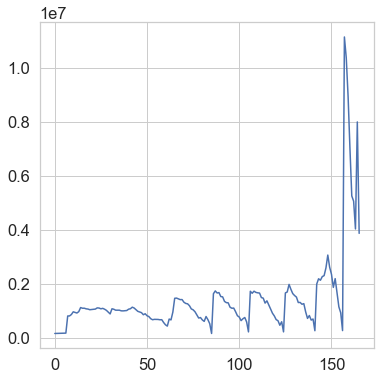

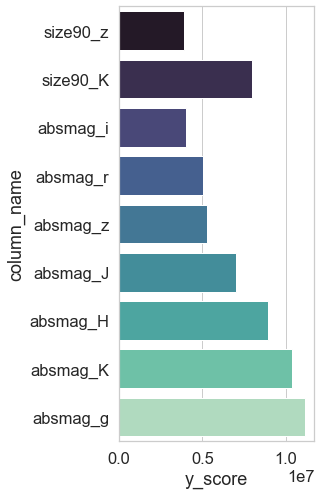

succes, Hybrid results found
Settings: Database: Spectral, k = 3, p = 30


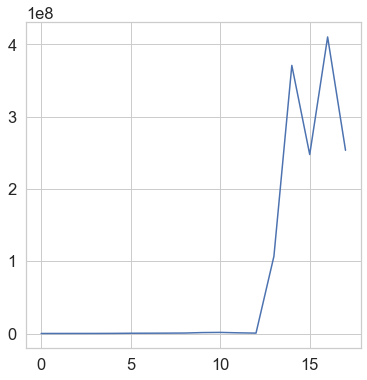

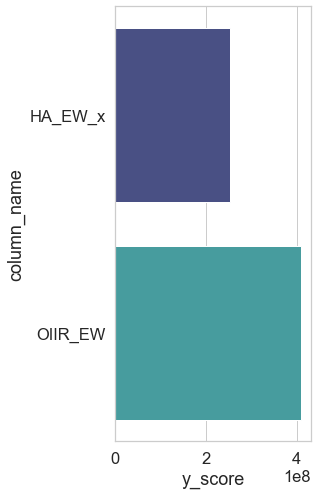

succes, Hybrid results found
Settings: Database: Combined, k = 3, p = 30


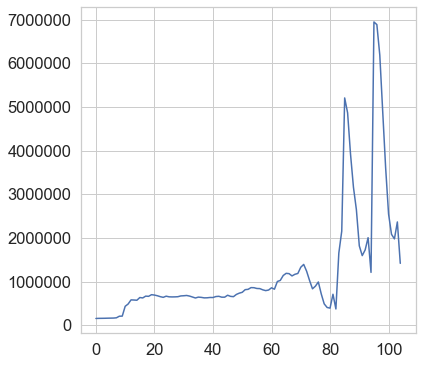

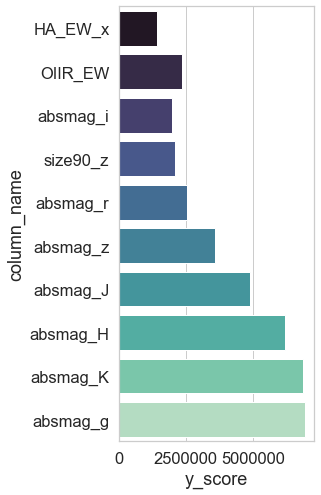

succes, Hybrid results found
Settings: Database: Direct_Summation, k = 3, p = 30


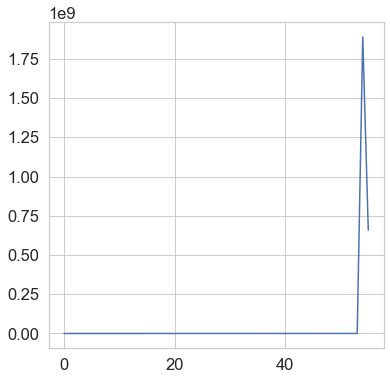

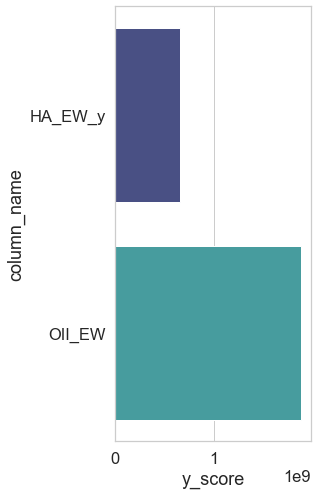

succes, Hybrid results found
Settings: Database: full, k = 3, p = 30


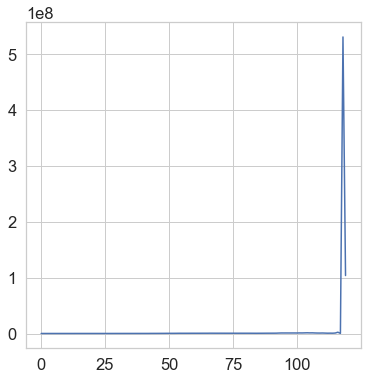

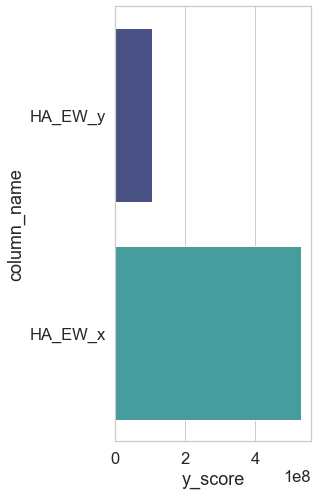

In [59]:
for i in dataframes:
    plot_BE(i, k = 3, p = 30, remake=False)

New file requested
Failed to find Hybrid results, or remake requested
Settings: Database: Combined, k = 3, p = 30
New laplacian file requested
Failed to find Laplacian results, creating database
62  remaining features
initial y_best: 157399.58, Ellipticity_z
Laplace rank: 61, new y_best: 160139.28, Ellipticity_H
Laplace rank: 60, new y_best: 160972.38, Ellipticity_J
Laplace rank: 59, new y_best: 162032.37, Ellipticity_K
Laplace rank: 58, new y_best: 163951.31, Ellipticity_r
Laplace rank: 57, new y_best: 165481.46, Ellipticity_i
Laplace rank: 56, new y_best: 166775.45, Ellipticity_g
Laplace rank: 55, new y_best: 172799.45, OIR_EW
Laplace rank: 54, new y_best: 208990.53, OIB_EW
Laplace rank: 53, new y_best: 211581.47, D4000N
Laplace rank: 52, new y_best: 436263.17, NIIB_EW_x
Laplace rank: 51, new y_best: 488171.27, OIIIB_EW_x
Laplace rank: 50, new y_best: 583142.50, SersicIndex_H
Laplace rank: 49, SersicIndex_J
Laplace rank: 48, SersicIndex_K
Laplace rank: 47, new y_best: 636968.61, Sers

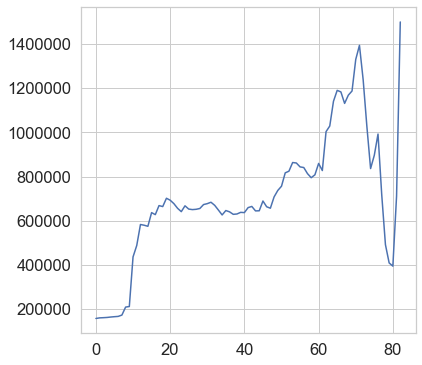

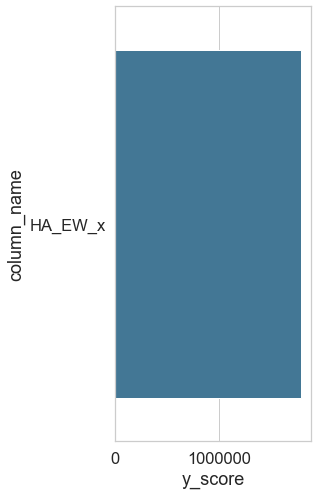

(  column_name       y_score
 0     HA_EW_x  1.789965e+06,
 [157399.5848529705,
  160139.277430607,
  160972.3846347893,
  162032.36923902118,
  163951.30883886723,
  165481.4626479867,
  166775.44664354235,
  172799.4517984295,
  208990.53456021147,
  211581.4739343525,
  436263.165810438,
  488171.26547897694,
  583142.5024482624,
  579838.1898719781,
  575001.7292645011,
  636968.6071690308,
  627901.8729821602,
  668823.0749228557,
  664355.713388066,
  702020.7370731488,
  693273.46906787,
  677752.444113261,
  656512.1690305048,
  641393.5591248472,
  667780.7970090588,
  653033.1818973233,
  650645.809947312,
  652034.6071738474,
  655687.4922998376,
  673478.1419760099,
  677628.5371744856,
  684005.2879445395,
  670015.6928107757,
  648615.5419782434,
  626435.7690254978,
  646393.7626944586,
  640527.8925857955,
  629254.5007993727,
  630784.6879532175,
  638182.1997645766,
  637030.6907584202,
  659646.6359371975,
  664949.8027356701,
  644754.8522707084,
  645317.193830099,

In [64]:
def WNCH(X, cluster_predict, n_clusters,  L_r,):
    """
    Weighted Normalised Calinski-Harabasz Index
    input: 
    X = pandas dataframe, shape: (n_samples , n_features). Each is a single data point
    Will assume lap_part if none is given
    lables = an array, shaped to (n_samples), predicting the label for each sample
    Will assume cluster_predict if none is given
    
    Returns:
    score as a float
    possible adjustment proposed:First number explodes so start n_features at 0 rather then 1.
    This means the graph always starts at 0
    """
    
    n_features = X.shape[1]
    n_samples = X.shape[0]    #the sample size, or n
    
    extra_disp = 0.
    intra_disp = 0.
    
    mean = np.mean(X, axis=0).values # mean of the whole partial matrix, per feature


    for k in range(n_clusters):
        cluster_k = X[cluster_predict == k].values   # a matrix with just objects belonging to this cluster
        mean_k = np.mean(cluster_k, axis=0)                 # the mean vector for every feature
        extra_disp += len(cluster_k) * np.sum((mean_k - mean) ** 2)  #add to the trace of S_B (non diagonal cancel out)
        intra_disp += np.sum((cluster_k - mean_k) ** 2)              #add to the trace of S_W (non diagonal cancel out)
    
    y =  (extra_disp * (n_samples - n_clusters) * n_features) / (intra_disp * (n_clusters - 1) * L_r )
    #print('y =',y)

    if intra_disp == 0.:
        return 1
    if n_features == 1:
        return y 
    else:
        return y
    


y_list = []
rank_list = []
def LS_WNCH_BE(eif_df, k = 3, p = 30):
    
    """
    Laplacian Score-WNCH-Backward Elimination
    ======================================
    Input:
    DF_name: Name of the dataframe, one of four possible right now, this is an F * N matrix
    F = number of features, N = number of datapoints)
    dropped: amount of data to be filtered with EIF
    k: the value of k for the k-means clustering test
    remake: Wether or not to remake the laplacian order matrix (memory intensive)
    
    ======================================
    Output: 
    
    ===============================================================
    Description:
    First hybrid method
    Builds n feature subsets (as many as featur)
    
    =================================================================
    
    
    Based on Solario-Fernandez et al, 2019 [1], 
    Sources: 
    sklear: https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index
    Python notebook: https://nbviewer.jupyter.org/github/rasbt/pattern_classification/
    blob/master/dimensionality_reduction/projection/linear_discriminant_analysis.ipynb#LDA-in-5-steps
    Books
    """
    global y_list, rank_list, S_best  #Due to recursion, we will otherwise lose this information
    # global y_list, rank_list, S_best  #Due to recursion, we will otherwise lose this information
    y_list2 = []     #Alternative for plotting
    S_best = 0
   # y_list.append(np.nan)
    X_S0 = eif_df  #need to define a global name for the matrix we are using
    #   DF_name = get_df_name(X_S0)   #gets the name of the original matrix    
    n_clusters = k


    # What to return if there is only one feature?
    if X_S0.shape[1] == 1:
        print("only one feature")
        S_best = X_S0.columns[0]
        # Calculate Y_best score here aswell (for comparison with different k)
        lap_part = pd.DataFrame(X_S0[S_best])
        scaler = StandardScaler()
        scaled = pd.DataFrame(scaler.fit_transform(lap_part),index=lap_part.index,columns=lap_part.columns)
        kmeans = KMeans(n_clusters= n_clusters).fit(scaled)
        cluster_predict = kmeans.predict(scaled)
        # Find y score from here
        L_r = laplace_order(spec_eif).iloc[0,1]     # Assumption made for unmodified score (with one feature, score is relative)
        y_score = WNCH(scaled, cluster_predict, n_clusters, L_r)      #determine initial rank 
        
        data = {'column_name':S_best, 'y_score':y_score}
        S_best = pd.DataFrame(data = data, index = [0])  
        print("S_best =", S_best)
        return S_best, y_list

        
    else:
        lap_matrix = laplace_order(X_S0, remake = True,save= False)
        n_features = lap_matrix.shape[0]
        
        
        print(n_features," remaining features")
        flag = False

        #first cluster run
        names = lap_matrix.iloc[:n_features+1].feature.values   # names of the top n features as an array  (This is for S_0)
        lap_part = X_S0[names]     #make a new dataframe where features are ordered by laplace score (This is ind_rank)!
        initial = lap_part 
        
        # clustering algorhitm (Kmeans chosen here)
        scaler = StandardScaler()
        scaled = pd.DataFrame(scaler.fit_transform(lap_part),index=
                              lap_part.index,columns=lap_part.columns)
        kmeans = KMeans(n_clusters= n_clusters).fit(scaled)  # set up a KMeans object, with expected amount of clusters, and fit to the partal dataframe
        cluster_predict = kmeans.predict(scaled)              #execute kmeans to predict, each object will be labeled with cluster number
        
        #WNCH check to find y_best        
        L_r = lap_matrix.iloc[n_features-1,1]            # Laplacian score associated with last r-th feature added or eliminated
        y_best = WNCH(scaled, cluster_predict, n_clusters, L_r)      #determine initial rank 
        print("initial y_best: %.2f, %s"%(y_best,names[-1]))
        
        y_list.append(y_best)
        y_list2.append(y_best)
        
        counter = 0        
        n_features = n_features - 1   #remove the i'th feature
               

        for rank_nr in np.arange(0,n_features)[::-1]:    # Start at 
            L_r = lap_matrix.iloc[rank_nr,1]             # Laplacian score associated with last r-th feature added or eliminated
            names = lap_matrix.iloc[:rank_nr+1].feature.values   # plus one due to how the slices work (does not include the end point)
            lap_part = X_S0[names]    # S_o <-- indRank

            #run a clustering algorhitm over X_S_0
            # set up a KMeans object, with expected amount of clusters, and fit to the partal dataframe
            scaler = StandardScaler()
            scaled = pd.DataFrame(scaler.fit_transform(lap_part),index=
                                  lap_part.index,columns=lap_part.columns)
            kmeans = KMeans(n_clusters= n_clusters).fit(scaled) 
            cluster_predict = kmeans.predict(scaled)             
            y = WNCH(scaled, cluster_predict, n_clusters, L_r)

            if y > y_best:
                y_best = y
                print("Laplace rank: %i, new y_best: %.2f, %s"%((rank_nr+1),y_best,names[-1]))
                S_best = names  #Best = names of all the remaining items
                flag = True
            else:
                print('Laplace rank: %i, %s'%((rank_nr+1),names[-1])) 
            
            #some feedback mechanisms
            y_list.append(y)   #bonus for plotting
            y_list2.append(y)
            
            counter = counter +1
            if counter >= p:  #check for number of runs
                print('break, p is exceeded')
                break
        
        if flag == True:
            print('recursion')
            return LS_WNCH_BE(X_S0[S_best], k = k, p = p)
           # run alghoritm with X_s_best         
        
        elif S_best == 0:
            print('No improvement found within p = %i'%(p))
            names = initial.columns[::-1].values[:len(y_list2)]
            print(len(names),len(y_list2))
            data = {'column_name':names, 'y_score':y_list2}
            S_best = pd.DataFrame(data = data)
            S_best = S_best[::-1]
            print("S_best =", S_best)
            return S_best, y_list
            
            
        else:
            #No S_best found within p, 
            print('else')
            data = {'column_name':S_best, 'y_score':y_list2[::-1]}
            S_best = pd.DataFrame(data = data, dtype='float32')  
            print("S_best =", S_best)
            return S_best, y_list
    #End of loop!

#%%
            
    
def BE_loader(eif_df, k, p, remake=False):
    """" remake required for full y_list, not just of last recursion"""
    global y_list
    try:
        DF_name = eif_df.name
    except:
        DF_name = "custom"

    while True:
        try:
            if remake == True:
                print("New file requested")
                raise NameError('Remake')
            S_best =  pd.read_hdf('hybrid_results.h5',"BE_results_%s_k_%i_p_%i_filtered_%i"%(DF_name, k,p,dropped))
            y_list = np.load("ylist/%s%i%i%i.npy"%(DF_name, k,p,dropped)) #This makes it into a np list, even if it fails to load
            print("succes, Hybrid results found")
            print("Settings: Database: %s, k = %i, p = %i"%(DF_name, k,p))
            break
            
        except (KeyError,FileNotFoundError, NameError):
            if DF_name == "custom":
                S_best, y_list = LS_WNCH_BE(eif_df, k = k, p = p)
                break
            y_list = []  #make it an ordinary list
            print("Failed to find Hybrid results, or remake requested")
            print("Settings: Database: %s, k = %i, p = %i"%(DF_name, k,p))
            S_best, y_list = LS_WNCH_BE(eif_df, k = k, p = p)  #Apply LS_WNCH_BE
            np.save("ylist/%s%i%i%i.npy"%(DF_name, k,p,dropped),y_list)
            S_best.to_hdf('hybrid_results.h5',"BE_results_%s_k_%i_p_%i_filtered_%i"%(DF_name, k,p,dropped))
        break
      
    return S_best, y_list

#%%
def plot_BE(eif_df, k = 3, p = 30, remake=False):
    """
    

    Parameters
    ----------
    eif_df : pandas dataframe 
        EIF filtered dataframe
    k : integer, optional
        number of clusters. The default is 3.
    p : integer, optional
        maximum number of runs. The default is 30.
    remake : boolean, optional
        DESCRIPTION. The default is False.

    Returns
    -------
    S_best : pandas DataFrame
        Shows the most important features, and relevant y scores
        note: first is always 1 at the moment
    y_list : TYPE
        List of how y develops. Simply for 

    """
    #Set lists to 0
    global y_list, rank_list
    y_list = []
    rank_list = []
    try:
        DF_name = eif_df.name
    except:
        DF_name = "custom"
    
    S_best, y_list = BE_loader(eif_df, k, p, remake=remake)
    
    fig = plt.subplots(figsize= (6,6))
    plt.plot(y_list)
    plt.show()

      
    fig, ax = plt.subplots(figsize=(3.5,8))
    #plt.xscale('log')
    sns.set(style="whitegrid",font_scale=1.5)
    plt.xlabel("WNCH score")
   # plt.title("Most important %s features of BE hybrid, k = %i, p = %i"%(DF_name,k,p),size='14')
    sns.barplot(x='y_score',y='column_name',data=S_best,palette="mako")
    plt.savefig("pics/BE/LS_WNCH_BE_%s_%i_%i"%(DF_name,k,p),bbox_inches="tight")
    plt.show()
    
    return S_best, y_list

plot_BE(combi_eif, 3, 30, remake=True)